In [1]:
import gym 
from utils import set_seed, total_params
import numpy as np
import matplotlib.pyplot as plt

from agents import DQNAgent, DRQNAgent, ADRQNAgent

In [2]:
# environment
env_id = "CartPole-v1"
env = gym.make(env_id)

# MDP

## DQN
We first look at how well we can do the most simple task with a simple DQN.  
As mentioned above, we use a DQN with ~37 000 parameters.

With the bellow chosen hyper-parameters we can achieve a perfect score for some specific seeds. RL is very stochastic, and even with fully working models, in theory, it is not uncommon for the training of DQN:s to simply fail for some seeds. There are methods to stabilize the training, however here only a rather basic DQN is used. 

An interesting thing to do is to change the seeds, and see that even though multiple models can find almost "perfect" strategies (often achieving the maximum score) the actual strategies may vary.

In [3]:
seed = 4
env.seed(seed)
set_seed(seed)

In [4]:
DQN_args = {
    'target_update': 50,
    'memory_size': 10000,
    'batch_size': 256,
    'epsilon_decay': 1/500,
    'max_epsilon': .9,
    'min_epsilon': 0.05,
    'gamma': 0.999,
    'POMDP': False, 
    'lr': 1e-3
}

DQN = DQNAgent(env, **DQN_args)

print(f'Number of parameters DQN: {total_params(DQN)}')

Number of parameters DQN: 37506


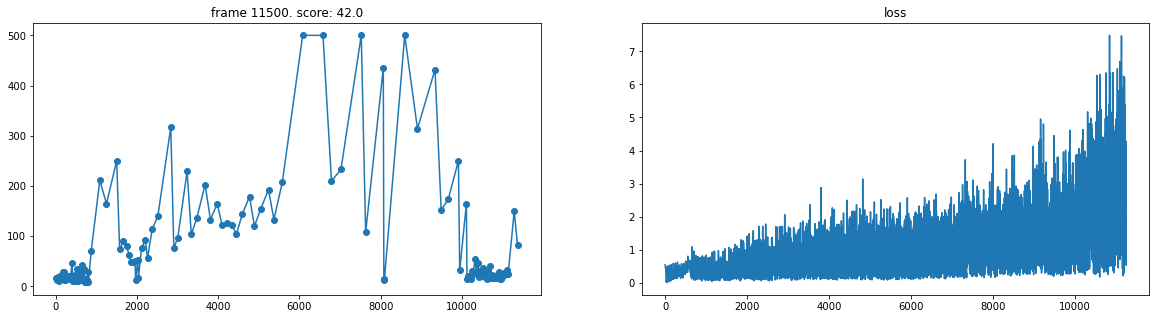

100%|██████████| 11500/11500 [02:06<00:00, 90.77it/s]


13.2

In [5]:
training_iterations = 11500
DQN.train(training_iterations)
DQN.test_score()

In [6]:
DQN.test()

score:  13.0


## DRQN

The training of a DRQN is much harder, and still more tuning of the hyperparameters needs to be performed.

In [7]:
seed = 5
env.seed(seed)
set_seed(seed)

In [8]:
DRQN_args = {
    'target_update': 50,
    'memory_size': 10000,
    'batch_size': 256,
    'epsilon_decay': 1/500,
    'max_epsilon': .9,
    'min_epsilon': 0.05,
    'gamma': 0.99,
    'POMDP': False, 
    'lr': 1e-3,
}

network_para = {'hidden_dim': 128,
                'hidden_input_size': 64,
                'num_layers': 2}

training_iterations = 15000

DRQN = DRQNAgent(env, NN_parameters = network_para, **DRQN_args)
print(f'Number of parameters DRQN: {total_params(DRQN)}')

Number of parameters DRQN: 244290


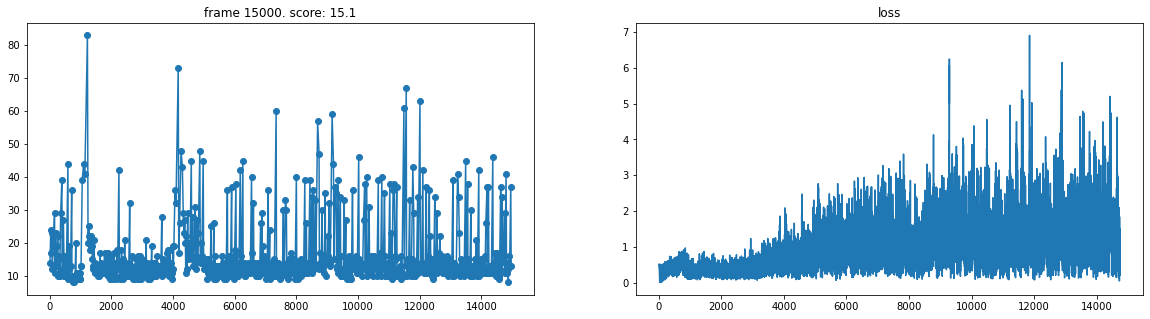

100%|██████████| 15000/15000 [08:07<00:00, 30.74it/s]


23.2

In [9]:
DRQN.train(training_iterations)
DRQN.test_score()
# the best results in the graph below is around 10-12k iterations

In [10]:
DRQN.test()

score:  20.0


## ADRQN

In [11]:
seed = 1
env.seed(seed)
set_seed(seed)

In [12]:
ADRQN_args = {
    'target_update': 25,
    'memory_size': 10000,
    'batch_size': 256,
    'epsilon_decay': 1/500,
    'max_epsilon': .9,
    'min_epsilon': 0.05,
    'gamma': 0.99,
    'POMDP': False, 
    'lr': 1e-3,
}

network_para = {'hidden_dim': 128,
                'hidden_input_size': 64,
                'num_layers': 2}

training_iterations = 15000

ADRQN = ADRQNAgent(env, NN_parameters = network_para, **ADRQN_args)
print(f'Number of parameters ADRQN: {total_params(ADRQN)}')

Number of parameters ADRQN: 244418


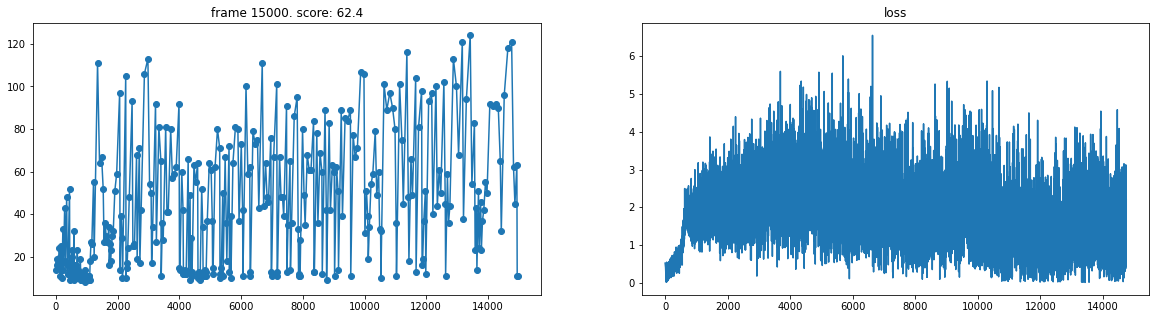

100%|██████████| 15000/15000 [11:17<00:00, 22.13it/s]


30.3

In [13]:
ADRQN.train(training_iterations)
ADRQN.test_score()

In [14]:
ADRQN.test()

score:  11.0


# POMDP
Up until no we have used the standard gym environment, where we observe both the position of the box and pole, and their velocity. We now change up the environment so it becomes Partially Observable, by removing the observation of the velocities. In theory here the recurrent models should performe better, however, as with the recurrent networks earlier, a lot more tuning is needed.

## DQN

In [15]:
seed = 2
env.seed(seed)
set_seed(seed)

In [16]:
DQN_args = {
    'target_update': 50,
    'memory_size': 10000,
    'batch_size': 256,
    'epsilon_decay': 1/500,
    'max_epsilon': .9,
    'min_epsilon': 0.05,
    'gamma': 0.999,
    'POMDP': True, 
    'lr': 1e-3
}

training_iterations = 10000

POMDP_DQN = DQNAgent(env, **DQN_args)

print(f'Number of parameters DQN: {total_params(DQN)}')

Number of parameters DQN: 37506


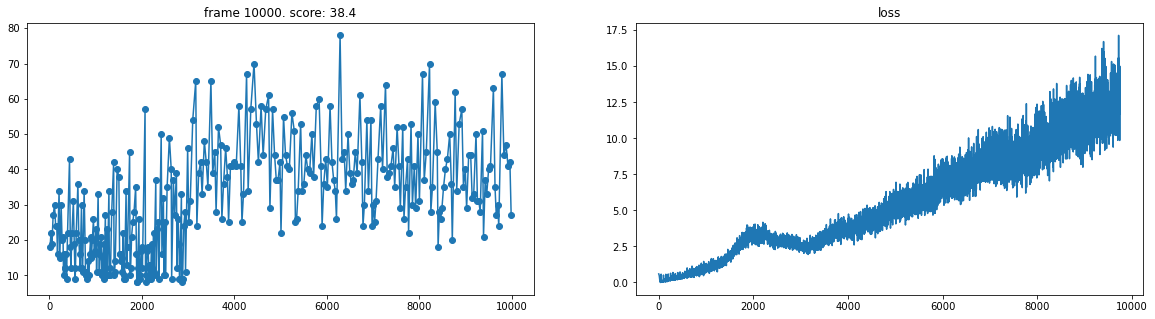

100%|██████████| 10000/10000 [02:10<00:00, 76.80it/s]


42.2

In [17]:
POMDP_DQN.train(training_iterations)
POMDP_DQN.test_score()

In [18]:
POMDP_DQN.test()

score:  38.0


## DRQN

In [19]:
seed = 1
env.seed(seed)
set_seed(seed)

In [20]:
DRQN_args = {
    'target_update': 50,
    'memory_size': 10000,
    'batch_size': 256,
    'epsilon_decay': 1/1000,
    'max_epsilon': .9,
    'min_epsilon': 0.05,
    'gamma': 0.99,
    'POMDP': True, 
    'lr': 1e-3,
}

network_para = {'hidden_dim': 128,
                'hidden_input_size': 64,
                'num_layers': 2}

training_iterations = 15000


POMDP_DRQN = DRQNAgent(env, NN_parameters = network_para, **DRQN_args)
print(f'Number of parameters DRQN: {total_params(DRQN)}')

Number of parameters DRQN: 244290


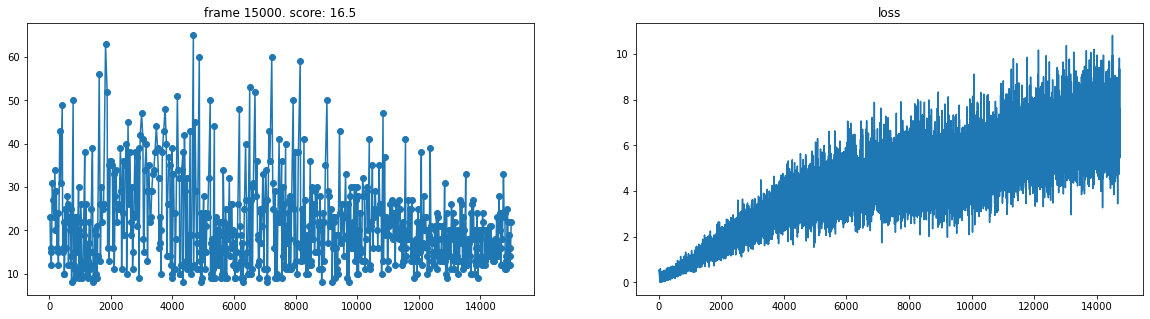

100%|██████████| 15000/15000 [10:42<00:00, 23.36it/s]


17.5

In [21]:
POMDP_DRQN.train(training_iterations)
POMDP_DRQN.test_score()

In [22]:
POMDP_DRQN.test()

score:  19.0


## ADRQN

In [23]:
seed = 1
env.seed(seed)
set_seed(seed)

In [24]:
ADRQN_args = {
    'target_update': 50,
    'memory_size': 10000,
    'batch_size': 256,
    'epsilon_decay': 1/1000,
    'max_epsilon': .9,
    'min_epsilon': 0.05,
    'gamma': 0.99,
    'POMDP': True, 
    'lr': 1e-3
}


network_para = {'hidden_dim': 64,
                'hidden_input_size': 64,
                'num_layers': 2}

training_iterations = 15000


POMDP_ADRQN = ADRQNAgent(env, NN_parameters = network_para, **ADRQN_args)
print(f'Number of parameters ADRQN: {total_params(ADRQN)}')

Number of parameters ADRQN: 244418


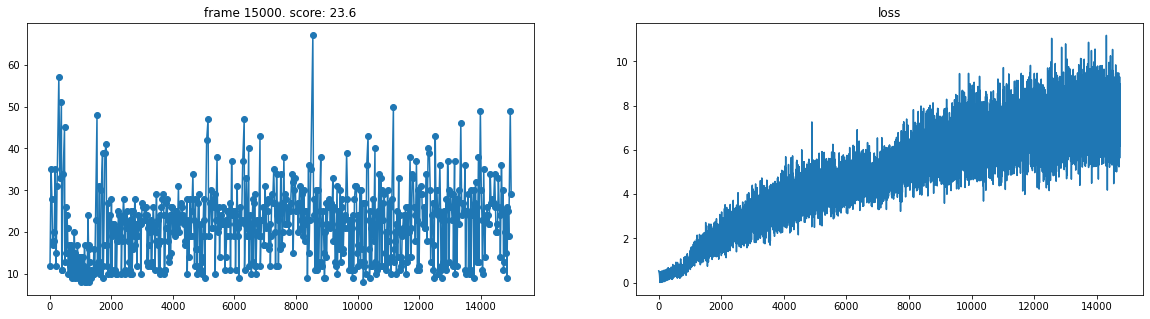

100%|██████████| 15000/15000 [08:39<00:00, 28.85it/s]


23.5

In [25]:
POMDP_ADRQN.train(training_iterations)
POMDP_ADRQN.test_score()

In [26]:
POMDP_ADRQN.test()

score:  25.0
